In [169]:
from bs4 import BeautifulSoup
import requests
import csv
import gspread
from google.oauth2.service_account import Credentials
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt


print('Starting PMP')
with open('PMPweather.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    sourcePMP = requests.get('https://forecast.weather.gov/MapClick.php?lat=38.312&lon=-104.6623').text

    soup = BeautifulSoup(sourcePMP, 'html.parser')

    currentConPMP = soup.find('div', {'id':'current_conditions-summary'})

    #Current temperature finder for PMP
    currentTempGrabPMP = currentConPMP.find('p',class_='myforecast-current-lrg').text
    currentTempPMP = 'Current Temp: ' + currentTempGrabPMP
    print(currentTempPMP)


    #Wind speed finder for PMP
    windSpeedGrabPMP = soup.find('div', {'id':'current_conditions_detail'})
    tablePMP = windSpeedGrabPMP.find_all('td')
    speedPMP = tablePMP[3].text
    print('Wind speed: ' + speedPMP)

    #Last Updated Time
    lutPMP = tablePMP[13].text
    print('Last Update: ' + lutPMP)

    writer.writerow(['Temperature', 'Wind Speed', 'Last Update'])
    writer.writerow([currentTempGrabPMP, speedPMP, lutPMP])
    writer.writerow([])
    writer.writerow(['Extended forecast'])

    #Extended forecast finder PMP
    sevenDayListPMP = soup.find('div',{'id':'seven-day-forecast-container'})
    extenGrabPMP = sevenDayListPMP.find_all('div')
    i = 0
    while i <= len(extenGrabPMP):
        PMP = extenGrabPMP[i]
        for p_tag in PMP.find_all('p'):
            if(p_tag.text != None):
                writer.writerow(p_tag.text.split())
                print(p_tag.text)
            i += 1
        print()
        print()
    writer.writerow([])
    writer.writerow([])
    #Detailed forecast for PMP
    writer.writerow([])
    writer.writerow(['Detailed 7 day forecast'])
    j = 0
    while j < 13:
        div_elements = soup.find_all('div', class_= 'col-sm-2 forecast-label')
        print(div_elements[j].text)
        div_elements2 = soup.find_all('div', class_= 'col-sm-10 forecast-text')
        print(div_elements2[j].text)
        writer.writerow([div_elements[j].text,div_elements2[j].text])
        j += 1
print('PMP Report Complete')

Starting PMP
Current Temp: 78°F
Wind speed: SW 5 mph
Last Update: 
                1 Jul 10:53 am MDT            
Today

High: 90 °F
Mostly Sunny


Thursday

High: 92 °F
Sunny thenSlight ChanceT-storms


Saturday

High: 92 °F
Sunny


Today
Mostly sunny, with a high near 90. Southeast wind 5 to 15 mph. 
Tonight
Mostly clear, with a low around 58. Southeast wind 10 to 15 mph becoming east southeast 5 to 10 mph after midnight. 
Wednesday
Sunny, with a high near 92. Light and variable wind becoming east southeast 5 to 10 mph in the afternoon. 
Wednesday Night
Mostly clear, with a low around 60. East southeast wind 5 to 10 mph becoming north northwest after midnight. 
Thursday
A 20 percent chance of showers and thunderstorms after noon.  Sunny, with a high near 92. Northwest wind 5 to 10 mph becoming southeast in the afternoon. 
Thursday Night
Partly cloudy, with a low around 62. South southwest wind 5 to 10 mph becoming northwest after midnight. 
Independence Day
Sunny, with a high near 92

In [170]:
with open('HPRweather.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    print('Starting HPR')
    sourceDeerTrail = requests.get('https://forecast.weather.gov/MapClick.php?textField1=39.61&textField2=-104.04').text

    soup = BeautifulSoup(sourceDeerTrail, 'html.parser')

    currentConDT = soup.find('div', {'id':'current_conditions-summary'})

    #Current temperature finder for Deer Trail
    currentTempGrabDT = currentConDT.find('p',class_='myforecast-current-lrg').text
    currentTempDT = 'Current Temp: ' + currentTempGrabDT
    print(currentTempDT)


    #Wind speed finder for Deer Trail
    windSpeedGrabDT = soup.find('div', {'id':'current_conditions_detail'})
    tableDT = windSpeedGrabDT.find_all('td')
    speedDT = tableDT[3].text
    print('Wind speed: ' + speedDT)

    #Last Updated Time
    lutDT = tableDT[13].text
    print('Last Update: ' + lutDT)

    writer.writerow(['Temperature', 'Wind Speed', 'Last Update'])
    writer.writerow([currentTempGrabDT, speedDT, lutDT])
    writer.writerow([])
    writer.writerow(['Extended forecast'])

    #Extended forecast finder Deer Trail
    sevenDayListDT = soup.find('div',{'id':'seven-day-forecast-container'})
    extenGrabDT = sevenDayListDT.find_all('div')
    i = 0
    while i <= len(extenGrabDT):
        DP = extenGrabDT[i]
        for p_tag in DP.find_all('p'):
            if(p_tag.text != None):
                writer.writerow(p_tag.text.split())
                print(p_tag.text)
                i += 1
        print()
        print()
    writer.writerow([])
    writer.writerow([])
    #Detailed forecast for Deer Trail
    writer.writerow([])
    writer.writerow(['Detailed 7 day forecast'])
    j = 0
    while j < 13:
        div_elements = soup.find_all('div', class_= 'col-sm-2 forecast-label')
        print(div_elements[j].text)
        div_elements2 = soup.find_all('div', class_= 'col-sm-10 forecast-text')
        print(div_elements2[j].text)
        writer.writerow([div_elements[j].text,div_elements2[j].text])
        j += 1
print('HPR Complete')


Starting HPR
Current Temp: 86°F
Wind speed: SW 8 mph
Last Update: 83°F (28°C)
Today

High: 89 °F
Mostly Sunnyand Breezy


Thursday

High: 91 °F
Sunny thenSlight ChanceT-storms


Saturday

High: 88 °F
Sunny


Today
Mostly sunny, with a high near 89. Breezy, with a south wind 17 to 21 mph, with gusts as high as 31 mph. 
Tonight
A 20 percent chance of showers and thunderstorms before 9pm.  Partly cloudy, with a low around 58. Breezy, with a south wind 10 to 17 mph, with gusts as high as 26 mph. 
Wednesday
Sunny, with a high near 91. South wind 11 to 14 mph, with gusts as high as 22 mph. 
Wednesday Night
Mostly clear, with a low around 58. Breezy, with a south wind 11 to 15 mph, with gusts as high as 23 mph. 
Thursday
A slight chance of showers between noon and 3pm, then a slight chance of showers and thunderstorms after 3pm.  Sunny, with a high near 91. South southeast wind around 11 mph, with gusts as high as 20 mph.  Chance of precipitation is 10%.
Thursday Night
A 20 percent chance of 

In [171]:
with open('PPIRweather.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    print('Starting PPIR')
    sourcePPIR = requests.get('https://forecast.weather.gov/MapClick.php?lat=38.5922&lon=-104.6761').text

    soup = BeautifulSoup(sourcePPIR, 'html.parser')

    currentConPPIR = soup.find('div', {'id':'current_conditions-summary'})

    #Current temperature finder for PPIR
    currentTempGrabPPIR = currentConPPIR.find('p',class_='myforecast-current-lrg').text
    currentTempPPIR = 'Current Temp: ' + currentTempGrabPPIR
    print(currentTempPPIR)


    #Wind speed finder for PPIR
    windSpeedGrabPPIR = soup.find('div', {'id':'current_conditions_detail'})
    tablePPIR = windSpeedGrabPPIR.find_all('td')
    speedPPIR = tablePPIR[3].text
    print('Wind speed: ' + speedPPIR)

    #Last Updated Time
    lutPPIR = tablePPIR[13].text
    print('Last Update: ' + lutPPIR)

    writer.writerow(['Temperature', 'Wind Speed', 'Last Update'])
    writer.writerow([currentTempGrabPPIR, speedPPIR, lutPPIR])
    writer.writerow([])
    writer.writerow(['Extended forecast'])
    #Extended forecast finder PPIR
    sevenDayListPPIR = soup.find('div',{'id':'seven-day-forecast-container'})
    extenGrabPPIR = sevenDayListPPIR.find_all('div')
    i = 0
    while i <= len(extenGrabPPIR):
        DP = extenGrabPPIR[i]
        for p_tag in DP.find_all('p'):
            if(p_tag.text != None):
                writer.writerow(p_tag.text.split())
                print(p_tag.text)
                i += 1
        print()
        print()
    writer.writerow([])
    writer.writerow([])
    #Detailed forecast for PPIR
    writer.writerow([])
    writer.writerow(['Detailed 7 day forecast'])
    j = 0
    while j < 13:
        div_elements = soup.find_all('div', class_= 'col-sm-2 forecast-label')
        print(div_elements[j].text)
        div_elements2 = soup.find_all('div', class_= 'col-sm-10 forecast-text')
        print(div_elements2[j].text)
        writer.writerow([div_elements[j].text,div_elements2[j].text])
        j += 1

Starting PPIR
Current Temp: 81°F
Wind speed: S 17 G 23 mph
Last Update: 80°F (27°C)
Today

High: 87 °F
Slight ChanceT-storms


Thursday

High: 91 °F
Sunny thenSlight ChanceT-storms


Saturday

High: 89 °F
Sunny thenSlight ChanceT-storms


Today
A slight chance of showers and thunderstorms between 3pm and 4pm.  Mostly sunny, with a high near 87. South southeast wind 10 to 15 mph.  Chance of precipitation is 10%.
Tonight
Mostly clear, with a low around 55. South southeast wind 5 to 15 mph becoming north after midnight. 
Wednesday
Sunny, with a high near 90. Light and variable wind becoming southeast 5 to 10 mph in the afternoon. 
Wednesday Night
Mostly clear, with a low around 57. Southeast wind 5 to 10 mph becoming north after midnight. 
Thursday
A 20 percent chance of showers and thunderstorms after noon.  Mostly sunny, with a high near 91. North northwest wind 5 to 10 mph becoming south southeast in the morning. 
Thursday Night
A 10 percent chance of showers and thunderstorms before m

In [172]:
with open('ROXweather.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    print('Starting ROX')
    sourceROX = requests.get('https://forecast.weather.gov/MapClick.php?lat=39.485472&lon=-105.075509').text

    soup = BeautifulSoup(sourceROX, 'html.parser')

    currentConROX = soup.find('div', {'id':'current_conditions-summary'})

    #Current temperature finder for ROX
    currentTempGrabROX = currentConROX.find('p',class_='myforecast-current-lrg').text
    currentTempROX = 'Current Temp: ' + currentTempGrabROX
    print(currentTempROX)


    #Wind speed finder for ROX
    windSpeedGrabROX = soup.find('div', {'id':'current_conditions_detail'})
    tableROX = windSpeedGrabROX.find_all('td')
    speedROX = tableROX[3].text
    print('Wind speed: ' + speedROX)

    #Last Updated Time
    lutROX = tableROX[13].text
    print('Last Update: ' + lutROX)

    writer.writerow(['Temperature', 'Wind Speed', 'Last Update'])
    writer.writerow([currentTempGrabROX, speedROX, lutROX])
    writer.writerow([])
    writer.writerow(['Extended forecast'])
    #Extended forecast finder ROX
    sevenDayListROX = soup.find('div',{'id':'seven-day-forecast-container'})
    extenGrabROX = sevenDayListROX.find_all('div')
    i = 0
    while i <= len(extenGrabROX):
        DP = extenGrabROX[i]
        for p_tag in DP.find_all('p'):
            if(p_tag.text != None):
                writer.writerow(p_tag.text.split())
                print(p_tag.text)
                i += 1
        print()
        print()
    writer.writerow([])
    writer.writerow([])
    #Detailed forecast for ROX
    writer.writerow([])
    writer.writerow(['Detailed 7 day forecast'])
    j = 0
    while j < 13:
        div_elements = soup.find_all('div', class_= 'col-sm-2 forecast-label')
        print(div_elements[j].text)
        div_elements2 = soup.find_all('div', class_= 'col-sm-10 forecast-text')
        print(div_elements2[j].text)
        writer.writerow([div_elements[j].text,div_elements2[j].text])
        j += 1

Starting ROX
Current Temp: 86°F
Wind speed: SW 6 mph
Last Update: 83°F (28°C)
Today

High: 91 °F
ChanceT-storms


Thursday

High: 91 °F
Sunny thenChanceT-storms


Saturday

High: 89 °F
Sunny thenSlight ChanceT-storms


Today
A 30 percent chance of showers and thunderstorms after 2pm.  Partly sunny, with a high near 91. South southeast wind 5 to 9 mph, with gusts as high as 16 mph. 
Tonight
Partly cloudy, with a low around 61. Southwest wind around 9 mph, with gusts as high as 17 mph. 
Wednesday
Sunny, with a high near 93. Southwest wind 5 to 10 mph becoming east in the morning. Winds could gust as high as 20 mph. 
Wednesday Night
Mostly clear, with a low around 62. East southeast wind 6 to 11 mph becoming southwest after midnight. Winds could gust as high as 20 mph. 
Thursday
A 40 percent chance of showers and thunderstorms after noon.  Mostly sunny, with a high near 91. Southwest wind 5 to 9 mph becoming northeast in the morning. Winds could gust as high as 17 mph. 
Thursday Night
A 2

In [173]:
print('Complete Reports')

Complete Reports


In [174]:
scopes = ['https://www.googleapis.com/auth/spreadsheets']  #connect to sheets api

creds = Credentials.from_service_account_file("Credentials.json", scopes=scopes) #use credentials to sign in to editor
client = gspread.authorize(creds)

sheet_id = '1kmjdN4TjdRgMEDntQNRzSQkRU6M7vRkdREHN0dL_GPA' #connect to correct google sheet file
sheet = client.open_by_key(sheet_id)

#set variables for each sheet within the workbook
worksheetHPR = sheet.get_worksheet(0)
worksheetPMP = sheet.get_worksheet(1)
worksheetPPIR = sheet.get_worksheet(2)
worksheetROX = sheet.get_worksheet(3)
worksheetDash= sheet.get_worksheet(4)

# grab time for data import accuracy
from datetime import datetime
dayTracker = datetime.today().strftime('%m-%d-%Y')
hourTracker = datetime.today().strftime('%H:%M:%S')
print(dayTracker)
print(hourTracker)

#strip formatting from temp
HPRNumTemp = currentTempGrabDT.replace('°F', '')
PMPNumTemp = currentTempGrabPMP.replace('°F', '')
PPIRNumTemp = currentTempGrabPPIR.replace('°F', '')
ROXNumTemp = currentTempGrabROX.replace('°F', '')

#set list of data to append and then append row to sheet
HPRImportList = [dayTracker, hourTracker, HPRNumTemp, speedDT, lutDT]
worksheetHPR.append_row(HPRImportList)
PMPImportList = [dayTracker, hourTracker, PMPNumTemp, speedPMP, lutPMP]
worksheetPMP.append_row(PMPImportList)
PPIRImportList = [dayTracker, hourTracker, PPIRNumTemp, speedPPIR, lutPPIR]
worksheetPPIR.append_row(PPIRImportList)
ROXImportList = [dayTracker, hourTracker, ROXNumTemp, speedROX, lutROX]
worksheetROX.append_row(ROXImportList)

print('Complete Online Update')


07-01-2025
11:56:59
Complete Online Update


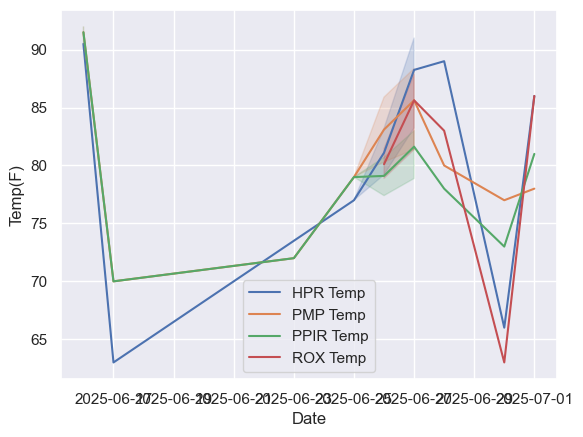

In [175]:
#create visulization in seaborn
dfHPR = pd.DataFrame(worksheetHPR.get_all_records()) #fill dataframe based on google sheets worksheet
dfHPR['Date'] = pd.to_datetime(dfHPR['Date']) #set date column to datetime format
dfHPR.sort_values(by=['Date'], ascending=True, inplace=True) #sort by ascending date

dfPMP = pd.DataFrame(worksheetPMP.get_all_records())
dfPMP['Date'] = pd.to_datetime(dfPMP['Date'])
dfPMP.sort_values(by=['Date'], ascending=True, inplace=True)

dfPPIR = pd.DataFrame(worksheetPPIR.get_all_records())
dfPPIR['Date'] = pd.to_datetime(dfPPIR['Date'])
dfPPIR.sort_values(by=['Date'], ascending=True, inplace=True)

dfROX = pd.DataFrame(worksheetROX.get_all_records())
dfROX['Date'] = pd.to_datetime(dfROX['Date'])
dfROX.sort_values(by=['Date'], ascending=True, inplace=True)


sns.set_theme(style = 'darkgrid') #set theme of plot
sns.lineplot(x='Date', y='Temp(F)', data=dfHPR, label='HPR Temp') #draw hpr temp data over time
sns.lineplot(x='Date', y='Temp(F)', data=dfPMP, label='PMP Temp')
sns.lineplot(x='Date', y='Temp(F)', data=dfPPIR, label='PPIR Temp')
sns.lineplot(x='Date', y='Temp(F)', data=dfROX, label='ROX Temp')
plt.savefig('Weather Scraper Temp.jpeg') #save temp data plot as jpeg

In [176]:
#math for creating dashboard
maxTempDT = dfHPR['Temp(F)'].max() #finding max temp all time of each location
print('Max temp at HPR: ' + str(maxTempDT) +'°F')
maxTempPMP = dfPMP['Temp(F)'].max()
print('Max temp at PMP: ' + str(maxTempPMP) +'°F')
maxTempPPIR = dfPPIR['Temp(F)'].max()
print('Max temp at PPIR: ' + str(maxTempPPIR) +'°F')
maxTempROX = dfROX['Temp(F)'].max()
print('Max temp at ROX: ' + str(maxTempROX) +'°F')

maxAnyLocat = max(maxTempDT, maxTempPMP, maxTempPPIR, maxTempROX) #find the all time max temp
print('All time max temp: ' + str(maxAnyLocat) + '°F')

minTempDT = dfHPR['Temp(F)'].min()
print('Min temp at HPR: ' + str(minTempDT) + '°F')
minTempPMP = dfPMP['Temp(F)'].min()
print('Min temp at PMP: ' + str(minTempPMP) + '°F')
minTempPPIR = dfPPIR['Temp(F)'].min()
print('Min temp at PPIR: ' + str(minTempPPIR) + '°F')
minTempROX = dfROX['Temp(F)'].min()
print('Min temp at ROX: ' + str(minTempROX) +'°F')

minAnyLocat = min(minTempDT, minTempPMP, minTempPPIR, minTempROX) #find the all time min temp
print('All time min temp: ' + str(minAnyLocat) + '°F')

#write to google sheet dashboard

worksheetDash.update_acell('A2', str(maxAnyLocat))
worksheetDash.update_acell('A4', str(maxTempDT))
worksheetDash.update_acell('A6', str(maxTempPPIR))
worksheetDash.update_acell('A8', str(maxTempPMP))
worksheetDash.update_acell('A10', str(maxTempROX))
worksheetDash.update_acell('E2', str(minAnyLocat))
worksheetDash.update_acell('E4', str(minTempDT))
worksheetDash.update_acell('E6', str(minTempPPIR))
worksheetDash.update_acell('E8', str(minTempPMP))
worksheetDash.update_acell('E10', str(minTempROX))

#find date value for each location highest temp
mtFindDT = worksheetHPR.find(str(maxTempDT))
cellMakerDT = 'A' + str(mtFindDT.row)
dateFindDT = worksheetHPR.acell(cellMakerDT).value
worksheetDash.update_acell('B4', str(dateFindDT))

mtFindPPIR = worksheetPPIR.find(str(maxTempPPIR))
cellMakerPPIR = 'A' + str(mtFindPPIR.row)
dateFindPPIR = worksheetPPIR.acell(cellMakerPPIR).value
worksheetDash.update_acell('B6', str(dateFindPPIR))

mtFindPMP = worksheetPMP.find(str(maxTempPMP))
cellMakerPMP = 'A' + str(mtFindPMP.row)
dateFindPMP = worksheetPMP.acell(cellMakerPMP).value
worksheetDash.update_acell('B8', str(dateFindPMP))

mtFindROX = worksheetROX.find(str(maxTempROX))
cellMakerROX = 'A' + str(mtFindROX.row)
dateFindROX = worksheetROX.acell(cellMakerROX).value
worksheetDash.update_acell('B10', str(dateFindROX))

#find the date value for each location lowest temp
ltFindDT = worksheetHPR.find(str(minTempDT))
cellMakerDTMin = 'A' + str(ltFindDT.row)
dateFindDTMIN = worksheetHPR.acell(cellMakerDTMin).value
worksheetDash.update_acell('F4', str(dateFindDTMIN))

ltFindPPIR = worksheetPPIR.find(str(minTempPPIR))
cellMakerPPIRMIN = 'A' + str(ltFindPPIR.row)
dateFindPPIRMIN = worksheetPPIR.acell(cellMakerPPIRMIN).value
worksheetDash.update_acell('F6', str(dateFindPPIRMIN))

ltFindPMP = worksheetPMP.find(str(minTempPMP))
cellMakerPMPMIN = 'A' + str(ltFindPMP.row)
dateFindPMPMIN = worksheetPMP.acell(cellMakerPMPMIN).value
worksheetDash.update_acell('F8', str(dateFindPMPMIN))

ltFindROX = worksheetROX.find(str(minTempROX))
cellMakerROXMIN = 'A' + str(ltFindROX.row)
dateFindROXMIN = worksheetROX.acell(cellMakerROXMIN).value
worksheetDash.update_acell('F10', str(dateFindROXMIN))

#find the cell with the max temp for date grabbing
cellPMP = worksheetPMP.find(str(maxAnyLocat))
cellHPR = worksheetHPR.find(str(maxAnyLocat))
cellPPIR = worksheetPPIR.find(str(maxAnyLocat))
cellROX = worksheetROX.find(str(maxAnyLocat))
if cellPMP:
    print(f"Value found in PMP at row {cellPMP.row}, column {cellPMP.col}")
    worksheetDash.update_acell('B2', str(dateFindPMP))
    worksheetDash.update_acell('C2', 'PMP')
else:
    print("Value not found at PMP.")
if cellHPR:
    print(f"Value found in HPR at row {cellHPR.row}, column {cellHPR.col}")
    worksheetDash.update_acell('B2', str(dateFindHPR))
    worksheetDash.update_acell('C2', 'HPR')
else:
    print("Value not found at HPR.")
if cellPPIR:
    print(f"Value found in PPIR at row {cellPPIR.row}, column {cellPPIR.col}")
    worksheetDash.update_acell('B2', str(dateFindPPIR))
    worksheetDash.update_acell('C2', 'PPIR')
else:
    print("Value not found at PPIR.")
if cellROX:
    print(f"Value found in ROX at row {cellROX.row}, column {cellROX.col}")
    worksheetDash.update_acell('B2', str(dateFindROX))
    worksheetDash.update_acell('C2', 'ROX')
else:
    print("Value not found at ROX.")

#find the cell with the lowest temp for date grabbing
cellPMPmin = worksheetPMP.find(str(minAnyLocat))
cellHPRmin = worksheetHPR.find(str(minAnyLocat))
cellPPIRmin = worksheetPPIR.find(str(minAnyLocat))
cellROXmin = worksheetROX.find(str(minAnyLocat))
if cellPMPmin:
    print(f"Value found in PMP at row {cellPMPmin.row}, column {cellPMPmin.col}")
    worksheetDash.update_acell('F2', str(dateFindPMPmin))
    worksheetDash.update_acell('G2', 'PMP')
else:
    print("Value not found at PMP.")
if cellHPRmin:
    print(f"Value found in HPR at row {cellHPRmin.row}, column {cellHPRmin.col}")
    worksheetDash.update_acell('F2', str(dateFindDTMIN))
    worksheetDash.update_acell('G2', 'HPR')
else:
    print("Value not found at HPR.")
if cellPPIRmin:
    print(f"Value found in PPIR at row {cellPPIRmin.row}, column {cellPPIRmin.col}")
    worksheetDash.update_acell('F2', str(dateFindPPIRMIN))
    worksheetDash.update_acell('G2', 'PPIR')
else:
    print("Value not found at PPIR.")
if cellROXmin:
    print(f"Value found in ROX at row {cellROXmin.row}, column {cellROXmin.col}")
    worksheetDash.update_acell('F2', str(dateFindROXMIN))
    worksheetDash.update_acell('G2', 'ROX')
else:
    print("Value not found at ROX.")

#average for the month at each location
HPRavgByMnth = dfHPR.groupby(pd.PeriodIndex(dfHPR['Date'], freq='M'))['Temp(F)'].mean()
PPIRavgByMnth = dfPPIR.groupby(pd.PeriodIndex(dfPPIR['Date'], freq='M'))['Temp(F)'].mean()
PMPavgByMnth = dfPMP.groupby(pd.PeriodIndex(dfPMP['Date'], freq='M'))['Temp(F)'].mean()
ROXavgByMnth = dfROX.groupby(pd.PeriodIndex(dfROX['Date'], freq='M'))['Temp(F)'].mean()
print(HPRavgByMnth, PPIRavgByMnth, PMPavgByMnth, ROXavgByMnth)

#max of the months
HPRmaxMonth = dfHPR.groupby(pd.PeriodIndex(dfHPR['Date'], freq='M'))['Temp(F)'].max()
print(HPRmaxMonth)
PPIRmaxMonth = dfPPIR.groupby(pd.PeriodIndex(dfPPIR['Date'], freq='M'))['Temp(F)'].max()
print(PPIRmaxMonth)
PMPmaxMonth = dfPMP.groupby(pd.PeriodIndex(dfPMP['Date'], freq='M'))['Temp(F)'].max()
print(PMPmaxMonth)
ROXmaxMonth = dfROX.groupby(pd.PeriodIndex(dfROX['Date'], freq='M'))['Temp(F)'].max()
print(ROXmaxMonth)

#min of the months
HPRminMonth = dfHPR.groupby(pd.PeriodIndex(dfHPR['Date'], freq='M'))['Temp(F)'].min()
PPIRminMonth = dfPPIR.groupby(pd.PeriodIndex(dfPPIR['Date'], freq='M'))['Temp(F)'].min()
PMPminMonth = dfPMP.groupby(pd.PeriodIndex(dfPMP['Date'], freq='M'))['Temp(F)'].min()
ROXminMonth = dfROX.groupby(pd.PeriodIndex(dfROX['Date'], freq='M'))['Temp(F)'].min()
print(HPRminMonth, PPIRminMonth, PMPminMonth, ROXminMonth)

Max temp at HPR: 91°F
Max temp at PMP: 92°F
Max temp at PPIR: 92°F
Max temp at ROX: 88°F
All time max temp: 92°F
Min temp at HPR: 63°F
Min temp at PMP: 70°F
Min temp at PPIR: 70°F
Min temp at ROX: 63°F
All time min temp: 63°F
Value found in PMP at row 3, column 3
Value not found at HPR.
Value found in PPIR at row 3, column 3
Value not found at ROX.
Value not found at PMP.
Value found in HPR at row 4, column 3
Value not found at PPIR.
Value found in ROX at row 20, column 3
Date
2025-06    82.153846
2025-07    86.000000
Freq: M, Name: Temp(F), dtype: float64 Date
2025-06    79.392857
2025-07    81.000000
Freq: M, Name: Temp(F), dtype: float64 Date
2025-06    82.321429
2025-07    78.000000
Freq: M, Name: Temp(F), dtype: float64 Date
2025-06    80.75
2025-07    86.00
Freq: M, Name: Temp(F), dtype: float64
Date
2025-06    91
2025-07    86
Freq: M, Name: Temp(F), dtype: int64
Date
2025-06    92
2025-07    81
Freq: M, Name: Temp(F), dtype: int64
Date
2025-06    92
2025-07    78
Freq: M, Name: